In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import matplotlib.ticker as plticker

## Independent Medical Review (IMR) Determination & Trends

This data is from the California Department of Managed Health Care (DMHC). It contains all decisions from Independent Medical Reviews (IMR) administered by the DMHC since January 1, 2001. An IMR is an independent review of a denied, delayed, or modified health care service that the health plan has determined to be not medically necessary, experimental/investigational or non-emergent/urgent. If the IMR is decided in an enrollees favor, the health plan must authorize the service or treatment requested.

In [2]:
# Resaved file as 'CSV UTF-8'.
imr = pd.read_csv('data/imr_trends.csv')
imr.head()

,ReferenceID,ReportYear,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,IMRType,DaysToReview,DaysToAdopt,Findings
0,MN20-32737,2020,Mental Disorder,Anxiety,Mental Health,RTC,Overturned Decision of Health Plan,Medical Necessity,11 to 20,Female,Expedited,1.0,12,Nature of Statutory Criteria/Case Summary: The...
1,MN20-32736,2020,Immuno Disorders,Arthritis,Pharmacy,Pain Medication,Overturned Decision of Health Plan,Medical Necessity,51 to 64,Female,Expedited,2.0,12,Nature of Statutory Criteria/Case Summary: The...
2,MN20-32735,2020,Digestive System/ GI,Crohn's Disease,Pharmacy,Biologics,Overturned Decision of Health Plan,Medical Necessity,21 to 30,Female,Expedited,5.0,11,Nature of Statutory Criteria/Case Summary: The...
3,MN20-32734,2020,Orth/Musculoskeletal,Shoulder Problem/Pain,Pharmacy,Anti-Depressants,Upheld Decision of Health Plan,Medical Necessity,51 to 64,Female,Expedited,2.0,26,Nature of Statutory Criteria/Case Summary: The...
4,MN20-32733,2020,Mental Disorder,AlcoholAbuse/Addiction,Mental Health,RTC,Overturned Decision of Health Plan,Medical Necessity,31 to 40,Male,Expedited,3.0,12,Nature of Statutory Criteria/Case Summary: The...


In [3]:
# 'Treatment SubCategory' and 'DiagnosisSubcategory' are missing 2 values.
# 'AgeRange' and 'PatientGender' are missing 685 values.
# 'DaysToReview' is missing 663 values.
#  What to do with the missing data?
# Apply mean or medican to fill in the missing values for "DaysToReview".
# "AgeRange" and "PatientGender" are slightly more challenging. 
# Suspect some cases gender corresponds with a certain diagnosis and/or treatment category, e.g. women and OB/NY.
# Suspect some cases the age corresponds with certain diagnoses and treatment categories, e.g. children and pediatrics.
# A thorough deep dive would be required to correctly fill the missing values. 
#  Filling in the low number would provide limited value.
imr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28773 entries, 0 to 28772
Data columns (total 14 columns):
ReferenceID             28773 non-null object
ReportYear              28773 non-null int64
DiagnosisCategory       28773 non-null object
DiagnosisSubCategory    28771 non-null object
TreatmentCategory       28773 non-null object
TreatmentSubCategory    28771 non-null object
Determination           28773 non-null object
Type                    28773 non-null object
AgeRange                28088 non-null object
PatientGender           28088 non-null object
IMRType                 28773 non-null object
DaysToReview            28110 non-null float64
DaysToAdopt             28773 non-null int64
Findings                28773 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB


In [4]:
(2+685+663)#/28773

1350

In [5]:
imr.describe()

,ReportYear,DaysToReview,DaysToAdopt
count,28773.000000,28110.000000,28773.000000
mean,2012.631877,17.037887,38.266291
std,4.998202,10.173357,21.128702
min,2001.000000,0.000000,2.000000
25%,2009.000000,9.000000,28.000000
50%,2014.000000,19.000000,37.000000
75%,2017.000000,21.000000,46.000000
max,2020.000000,133.000000,636.000000


---
## Unique Values

In [7]:
# TREATMENT CATEGORIES
unq0 = list(imr['Determination'].unique())
print('# of Unique Deterimnation Outcomes: {}'.format(len(unq0)))
print('\n')
print(unq0)

# of Unique Deterimnation Outcomes: 2


['Overturned Decision of Health Plan', 'Upheld Decision of Health Plan']


In [8]:
# DIAGNOSIS CATEGORIES
# CNS = Central Nervous System
# GI = Gastronintenstinal
# OB/GYN = Obstretician and Gynecologist
unq1 = list(imr['DiagnosisCategory'].unique())
print('# of Unique Diagnosis Categories: {}'.format(len(unq1)))
print('\n')
print(unq1)

# of Unique Diagnosis Categories: 29


['Mental Disorder', 'Immuno Disorders', 'Digestive System/ GI', 'Orth/Musculoskeletal', 'Cancer', 'CNS/ Neuromusc Dis', 'Skin Disorders', 'Endocrine/Metabolic', 'Cardiac/Circ Problem', 'Autism Spectrum', 'GU/ Kidney Disorder', 'Pediatrics', 'Blood Related Disord', 'Prevention/Good Hlth', 'Genetic Diseases', 'Vision', 'Foot Disorder', 'Dental Problems', 'Respiratory System', 'Ears/Nose/Throat', 'Trauma/ Injuries', 'Infectious Disease', 'Pregnancy/Childbirth', 'Post Surgical Comp', 'Morbid Obesity', 'OB-GYN/ Pregnancy', 'Chron Pain Synd', 'Not Applicable', 'Other']


In [9]:
# TREATMENT CATEGORIES
unq2 = list(imr['TreatmentCategory'].unique())
print('# of Unique Treatment Categories: {}'.format(len(unq2)))
print('\n')
print(unq2)

# of Unique Treatment Categories: 34


['Mental Health', 'Pharmacy', 'Cancer Care', 'Orthopedic Proc', 'Reconstr/Plast Proc', 'Pain Management', 'Diag Imag & Screen', 'Diag/ MD Eval', 'Rehab/ Svc - Outpt', 'Autism Related Tx', 'Ob-Gyn Proc', 'Urology Proc', 'Gen Surg Proc', 'Elect/Therm/Radfreq', 'DME', 'Special Proc', 'Ear-Nose-Thro Proc', 'Vision Services/Ophthalmology', 'Dent/Orthodont Proc', 'Acute Med Svc Inpt', 'Neurosurgery Proc', 'Cardio-Vasc Proc', 'Rehab/Svcs SNF Inpt', 'Chiropractic Care', 'Alternative Tx', 'Home Health Care', 'Transportation', 'Not Applicable', 'Emergency/Urg Care', 'Vision Services', 'Ophthalmology Proc', 'Prev Health Screen', 'MLTSS', 'Gen Surg proc']


In [10]:
# AGE RANGE
unq3 = list(imr['AgeRange'].unique())
print('# of Unique Age Ranges: {}'.format(len(unq3)))
print('\n')
print(unq3)

# of Unique Age Ranges: 8


['11 to 20', '51 to 64', '21 to 30', '31 to 40', '65+', '41 to 50', '0 to 10', nan]


In [11]:
# Type
unq4 = list(imr['Type'].unique())
print('# of Unique Type Descriptions: {}'.format(len(unq4)))
print('\n')
print(unq4)

# of Unique Type Descriptions: 3


['Medical Necessity', 'Experimental/Investigational', 'Urgent Care']


In [12]:
# IMR Type
unq5 = list(imr['IMRType'].unique())
print('# of Unique Type Descriptions: {}'.format(len(unq5)))
print('\n')
print(unq5)

# of Unique Type Descriptions: 2


['Expedited', 'Standard']


In [13]:
years = sorted(list(imr['ReportYear'].unique()))
years_x_axis = [0] + [y for y in years if y % 2 == 1]
print('# of Unique Deterimnation Outcomes: {}'.format(len(years)))
print('\n')
print(years)

# of Unique Deterimnation Outcomes: 20


[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [14]:
years_x_axis

[0, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019]

---
## Handling Missing Data

Avg. Days to Review: 17.0
Median Days to Review: 19.0
Mode of Days to Review: 0    21.0
dtype: float64


C:\Users\morga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\morga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


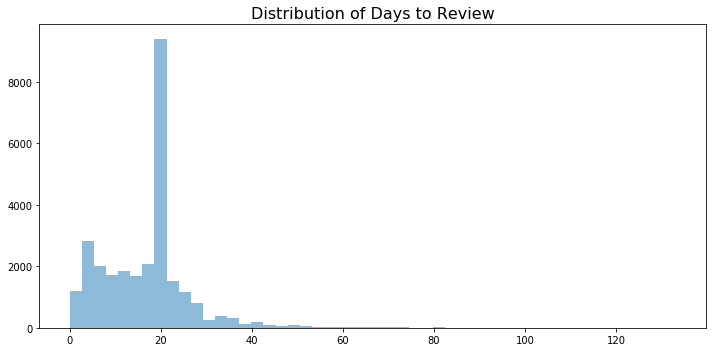

In [15]:
# HISTOGRAM OF DAYS TO REVIEW
# Suspect that the arbitrators have a deadline of 21 days/3 weeks to complete the review.
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(imr['DaysToReview'], bins=50, alpha=0.5)
ax.set_title('Distribution of Days to Review', fontsize=16)
plt.tight_layout();


print('Avg. Days to Review: {:.1f}'.format(imr['DaysToReview'].mean()))
print('Median Days to Review: {:.1f}'.format(imr['DaysToReview'].median()))
print('Mode of Days to Review: ' + str((imr['DaysToReview'].mode())))

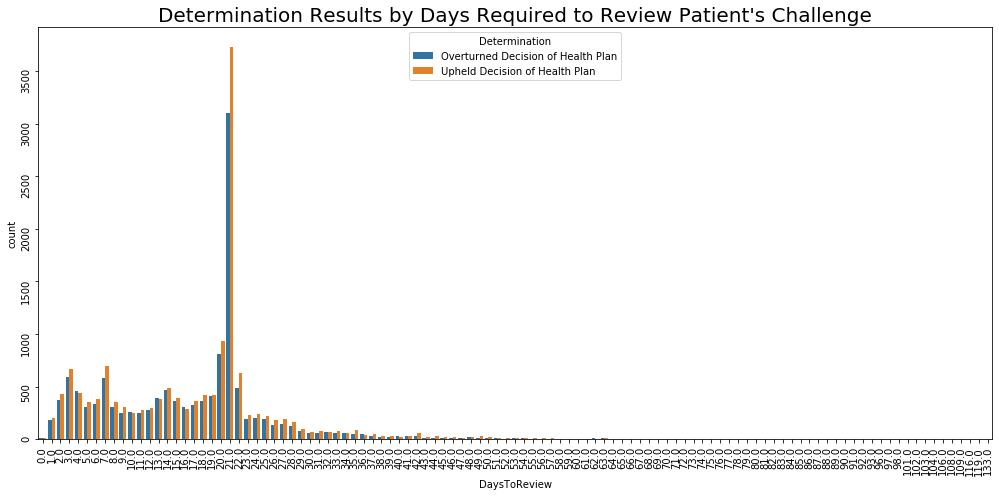

In [16]:
# DETERMINATION RESULTS BY DAYS TO REVIEW

fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='DaysToReview', data=imr, hue='Determination')
ax.set_title("Determination Results by Days Required to Review Patient's Challenge", fontsize=20)
ax.tick_params(labelrotation=90)
plt.tight_layout();

In [17]:
# Apply "DaysToReview" median to fill missing values within the feature.
imr['DaysToReview'].fillna(imr['DaysToReview'].median(), inplace=True)
imr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28773 entries, 0 to 28772
Data columns (total 14 columns):
ReferenceID             28773 non-null object
ReportYear              28773 non-null int64
DiagnosisCategory       28773 non-null object
DiagnosisSubCategory    28771 non-null object
TreatmentCategory       28773 non-null object
TreatmentSubCategory    28771 non-null object
Determination           28773 non-null object
Type                    28773 non-null object
AgeRange                28088 non-null object
PatientGender           28088 non-null object
IMRType                 28773 non-null object
DaysToReview            28773 non-null float64
DaysToAdopt             28773 non-null int64
Findings                28773 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB


In [18]:
# 689 missing values, 2.3% of initial dataset, after filling in the "DaysToReview".
# Reasonable to drop the values.
drop_na_test = imr.dropna(axis=0)
drop_na_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28084 entries, 0 to 28290
Data columns (total 14 columns):
ReferenceID             28084 non-null object
ReportYear              28084 non-null int64
DiagnosisCategory       28084 non-null object
DiagnosisSubCategory    28084 non-null object
TreatmentCategory       28084 non-null object
TreatmentSubCategory    28084 non-null object
Determination           28084 non-null object
Type                    28084 non-null object
AgeRange                28084 non-null object
PatientGender           28084 non-null object
IMRType                 28084 non-null object
DaysToReview            28084 non-null float64
DaysToAdopt             28084 non-null int64
Findings                28084 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.2+ MB


In [19]:
imr2 = imr.dropna(axis=0)
imr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28084 entries, 0 to 28290
Data columns (total 14 columns):
ReferenceID             28084 non-null object
ReportYear              28084 non-null int64
DiagnosisCategory       28084 non-null object
DiagnosisSubCategory    28084 non-null object
TreatmentCategory       28084 non-null object
TreatmentSubCategory    28084 non-null object
Determination           28084 non-null object
Type                    28084 non-null object
AgeRange                28084 non-null object
PatientGender           28084 non-null object
IMRType                 28084 non-null object
DaysToReview            28084 non-null float64
DaysToAdopt             28084 non-null int64
Findings                28084 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 3.2+ MB


---
## Exploratory Visualizations
<br><br>
Only reference imr2 below this point.

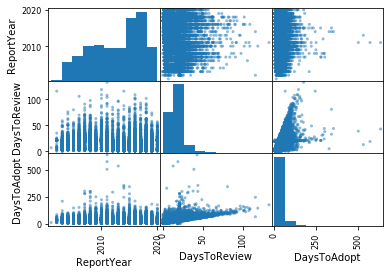

In [28]:
pd.plotting.scatter_matrix(imr2);

In [29]:
# Deliniated by 'Determination'
yr_grpd_1 = imr2.groupby(['ReportYear', 'Determination']).agg({'Determination':'count'})
yr_grpd_1.columns = ['count']
yr_grpd_1.reset_index(inplace=True)
yr_ovrtrnd = yr_grpd_1[yr_grpd_1['Determination'] == 'Overturned Decision of Health Plan']
yr_upheld = yr_grpd_1[yr_grpd_1['Determination'] == 'Upheld Decision of Health Plan']

# Total "Determinations" per year.
yr_grpd_2 = imr2.groupby(['ReportYear']).agg({'Determination':'count'})
yr_grpd_2.columns = ['count']
yr_grpd_2.reset_index(inplace=True)

# Merge
det_yr = pd.merge(yr_ovrtrnd, yr_grpd_2, how='left', on='ReportYear')
det_yr = pd.merge(det_yr, yr_upheld, how='left', on='ReportYear')
det_yr.rename({'count_x':'num_overturned', 'count_y':'total_reviewed', 'count':'num_upheld'}, axis=1, inplace=True)
det_yr.drop(['Determination_x', 'Determination_y'], inplace=True, axis=1)
det_yr['percent_overturned'] = det_yr['num_overturned'] / det_yr['total_reviewed'].astype(np.float)
det_yr

,ReportYear,num_overturned,total_reviewed,num_upheld,percent_overturned
0,2002,20,48,28,0.416667
1,2003,277,714,437,0.387955
2,2004,305,787,482,0.387548
3,2005,313,959,646,0.326382
4,2006,442,1080,638,0.409259
5,2007,571,1342,771,0.425484
6,2008,677,1520,843,0.445395
7,2009,639,1429,790,0.447166
8,2010,661,1452,791,0.455234
9,2011,684,1435,751,0.476655


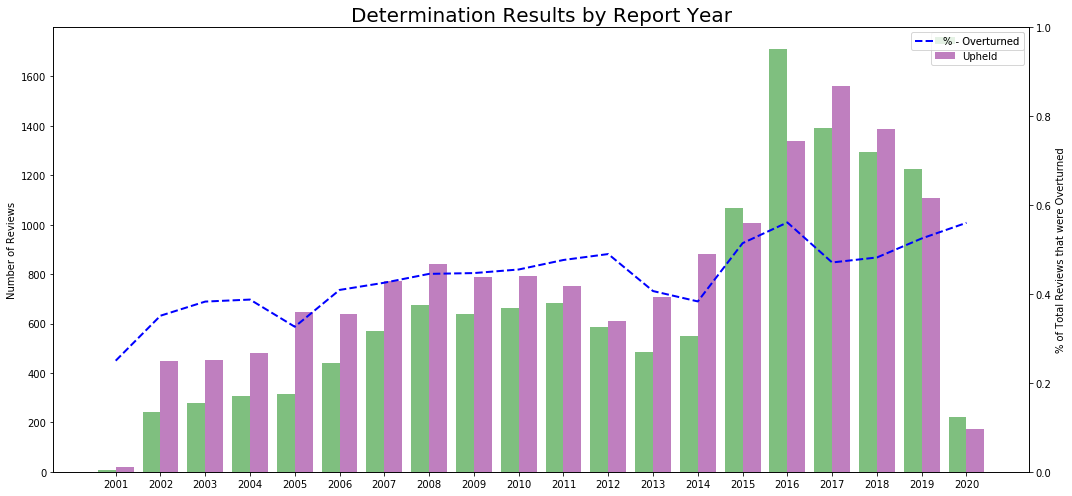

In [22]:
# DETERMINATION RESULTS BY REPORT YEAR
# Identify number of medical insurance rejection per year.
# Understand if the "raw number" trend is a result of the number of denials of medical care service.
pos = list(range(len(det_yr['ReportYear'])))
width = 0.4

fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(pos, det_yr['num_overturned'], width, alpha=0.5, color='g', label='Overturned')
ax1.bar([p + width for p in pos], det_yr['num_upheld'], width, alpha=0.5, color='purple', label='Upheld')
ax1.set_ylabel('Number of Reviews')
ax1.set_xticks([p + 0.5 * width for p in pos])
ax1.set_xticklabels(years)
ax1.set_title('Determination Results by Report Year', fontsize=20)
ax1.legend();

# Share x-axis
ax2=ax1.twinx()

ax2.set_ylabel('% of Total Reviews that were Overturned')
ax2.set_ylim(0,1)
ax2.plot([p + width/2 for p in pos], det_yr['percent_overturned'], color='b', linestyle='--', linewidth=2, 
         label='% - Overturned')

ax2.legend()
plt.tight_layout();


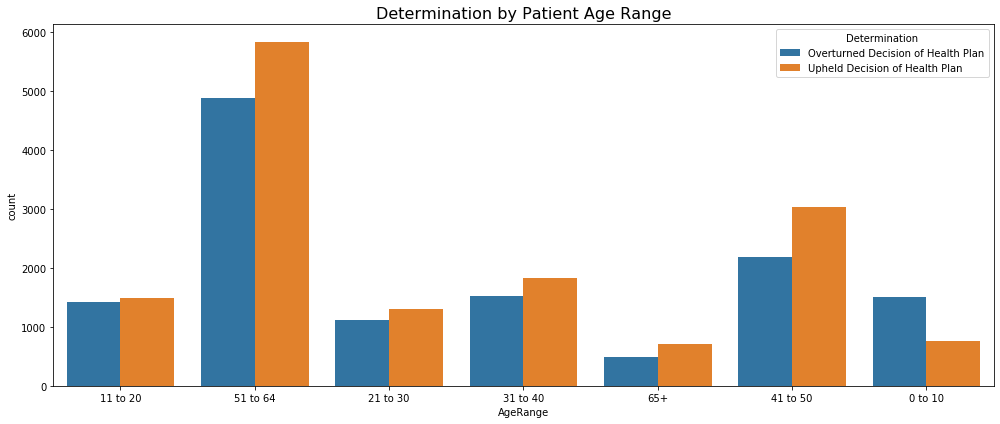

In [30]:
# Determination by Age
# SORT AGE RANGE
# Perform feature engineering.
# At a glance, it seems like the younger the patient, the more likely the the health plan's decision was overturned.
fig, ax = plt.subplots(figsize=(14,6))
g = sns.countplot(x='AgeRange', data=imr2, hue='Determination')
ax.set_title('Determination by Patient Age Range', fontsize=16)
plt.tight_layout();


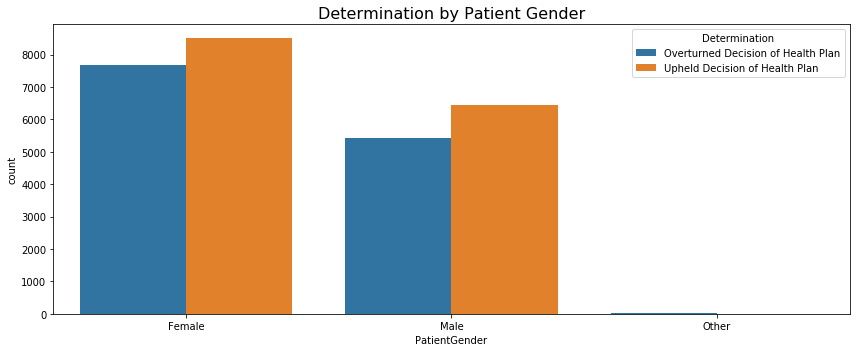

In [31]:
# Determination by Patient Gender
fig, ax = plt.subplots(figsize=(12,5))
g = sns.countplot(x='PatientGender', data=imr2, hue='Determination')
ax.set_title('Determination by Patient Gender', fontsize=16)
plt.tight_layout();


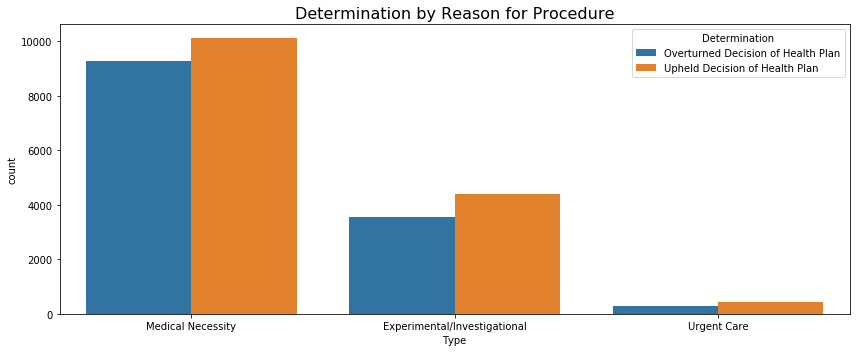

In [32]:
# DETERMINATION RESULTS BY REASON FOR PROCEDURE
# Slig
fig, ax = plt.subplots(figsize=(12,5))
g = sns.countplot(x='Type', data=imr2, hue='Determination')
ax.set_title('Determination by Reason for Procedure', fontsize=16)
plt.tight_layout();

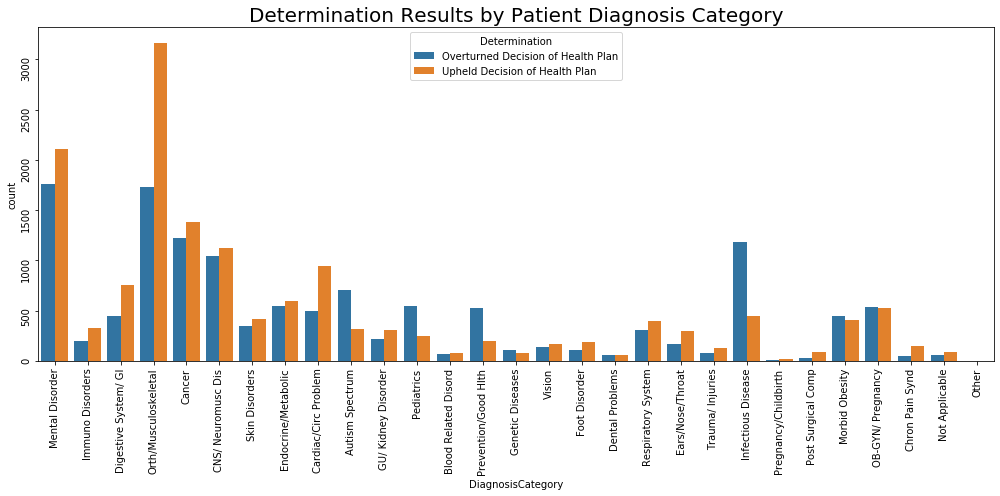

In [33]:
# DETERMINATION RESULTS BY DIAGNOSIS CATEGORY

# Diganosis categories where decisions were overturned more frequently than upheld:
# (1) Austism Spectrum; (2) Pediatrics; (3) Prevention/Good Health; (4) Infectious Disease

# Diagnosis categories where decisions were >=33% MORE LIKELY to be upheld than overturned:
# (1) Digestive System/GI (2) Orthopedic / Muskoskeletal; (3) Cardiac/Circulation Problems; (4) Foot Disorder
fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='DiagnosisCategory', data=imr2, hue='Determination')
ax.set_title('Determination Results by Patient Diagnosis Category', fontsize=20)
ax.tick_params(labelrotation=90)
plt.tight_layout();


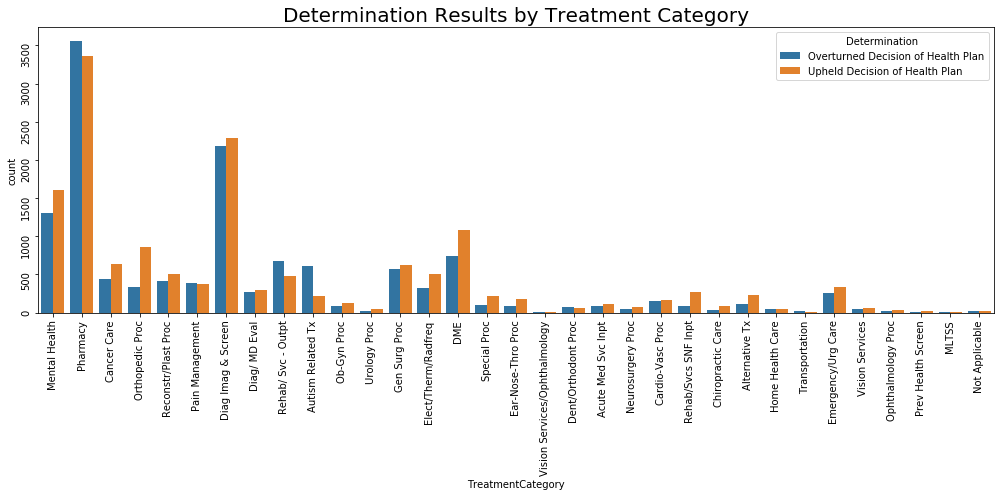

In [35]:
# DETERMINATION RESULTS BY TREATMENT CATEGORY
# DME = Durable Medical Equipment

fig, ax = plt.subplots(figsize=(14,7))
g = sns.countplot(x='TreatmentCategory', data=imr2, hue='Determination')
ax.set_title('Determination Results by Treatment Category', fontsize=20)
ax.tick_params(labelrotation=90)
plt.tight_layout();